In [1]:
%matplotlib inline

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#sns.set() # matplot lib defaults
plt.rcParams['figure.figsize'] = (24, 6)
%config InlineBackend.figure_format='retina'

In [7]:
# Database connection
import mysql.connector

host = '132.148.115.101'
database = 'lambdaStaging'
user='lambda2019'
password='JlgRzqmvh83Z'

con = mysql.connector.connect(host=host, database=database, user=user, password=password)

#table = ‘platform_market_prices2’

data = pd.read_sql("SELECT * FROM platform_market_prices2", con=con)

con.close()

In [ ]:
"""
Dry maize in Kampala (or UGA), will be very different from others (supplier market)
Dry Maize in Nairobi (or KEN) will be differnet (consumption market)
Black Beans in Rwanda are going to be different from the others
Millet Grain in UGA
Yellow beans in TZA
An Animal product (which ever has data) will likely have different seasonality
Peas are not a food staple in the region, but has a lot of data so that will be important
A fruit will also be important, but that could be based on data availabiltiy"""

In [31]:
data.head()

,id,source,country,market,product_cat,product_agg,product,date,retail,wholesale,currency,unit,active,udate
0,325345,InfoTrade,UGA,Kiboga,Cereals - Maize,Maize,Dry Maize,2019-02-11,600,550,UGX,kg,1,2019-02-13 02:10:32
1,325344,InfoTrade,UGA,Masindi,Beans,Beans,Yellow Beans,2019-02-11,3000,2800,UGX,kg,1,2019-02-13 01:50:33
2,325343,InfoTrade,UGA,Kiboga,Beans,Beans,Yellow Beans,2019-02-11,2200,1500,UGX,kg,1,2019-02-13 01:50:33
3,325342,InfoTrade,UGA,Kiboga,Animal Products,Animal Products - Other,Tilapia,2019-02-11,4400,4000,UGX,whole,1,2019-02-13 01:30:32
4,325341,InfoTrade,UGA,Masindi,Cereals - Other,Sorghum,Sorghum Grain,2019-02-11,1000,800,UGX,kg,1,2019-02-13 01:30:32


In [18]:
data.select_dtypes(exclude='number').describe()

,source,country,market,product_cat,product_agg,product,date,currency,unit,udate
count,115631,115631,115631,115631,115631,115631,115631,115631,115631,115631
unique,8,8,200,17,64,177,1208,5,50,21018
top,EAGC-RATIN,UGA,Nairobi,Beans,Beans,Dry Maize,2018-12-13 00:00:00,KES,1Kg,2018-12-14 08:12:35
freq,65568,41526,5137,28814,28814,6237,1698,70729,80888,633
first,NaN,NaN,NaN,NaN,NaN,NaN,2013-05-29 00:00:00,NaN,NaN,2018-12-12 00:10:52
last,NaN,NaN,NaN,NaN,NaN,NaN,2019-10-28 00:00:00,NaN,NaN,2019-10-20 08:30:48


In [27]:
country_names = data['country'].unique()
data['country'].value_counts()

UGA    41526
KEN    22499
RWA    21798
TZA    16438
BDI     6554
DRC     4259
SSD     1363
MWI     1194
Name: country, dtype: int64

In [28]:
data['currency'].value_counts()

KES    70729
UGX    29222
RWF    12841
TZS     1645
MWK     1194
Name: currency, dtype: int64

In [8]:
# cutoff-date to avoid large data gap, this can be automated later
cutoff_date='2011-09-20'
Market = 'Lira'

date_selected = (df['date']>cutoff_date )
market_selected = (df['market']==Market)
product_selected = ( df['product']=='Maize')

condition = date_selected & market_selected & product_selected
df = df[condition]
df.head()

,id,market,product,country,date,retail,wholesale,currency,year,month,day,week
60460,60460,Lira,Maize,Uganda,2011-09-21,NaN,599585.0,UGX,2011.0,9.0,21.0,38.0
60461,60461,Lira,Maize,Uganda,2011-09-22,NaN,658600.0,UGX,2011.0,9.0,22.0,38.0
60462,60462,Lira,Maize,Uganda,2011-09-23,NaN,657473.0,UGX,2011.0,9.0,23.0,38.0
60463,60463,Lira,Maize,Uganda,2011-09-24,NaN,666448.0,UGX,2011.0,9.0,24.0,38.0
60464,60464,Lira,Maize,Uganda,2011-09-27,NaN,648178.0,UGX,2011.0,9.0,27.0,39.0


In [9]:
# remove duplicated row
rows_rm = df.duplicated('date', keep='last')

if np.sum(rows_rm):
    df = df[~rows_rm]
    
print(f'Length of data before removing duplicates: {len(rows_rm)}, after {len(df)}')

Length of data before removing duplicates: 2239, after 1794


In [10]:
retail = df[['date', 'retail']]
retail = retail.sort_values('date')
retail.set_index('date', inplace=True)
retail.tail(10)

,retail
date,
2020-03-03,1200001.0
2020-03-05,1200360.0
2020-03-06,1196448.0
2020-03-10,1198771.0
2020-03-12,1200456.0
2020-03-13,1200656.0
2020-03-17,1205755.0
2020-03-19,1213854.0
2020-03-25,1188807.0


In [11]:
wholesale = df[['date', 'wholesale']].sort_values('date')
wholesale.set_index('date', inplace=True)
wholesale.loc['2011-09-01':'2011-09-30']


,wholesale
date,
2011-09-21,599585.0
2011-09-22,658600.0
2011-09-23,657473.0
2011-09-24,666448.0
2011-09-27,648178.0
2011-09-30,695379.0


In [12]:
# construct complete time frame
date_range = pd.date_range(start=retail.index[0], end=retail.index[-1], freq='D')

time_df=pd.DataFrame([], index=date_range)
time_df.head()

""
2011-09-21
2011-09-22
2011-09-23
2011-09-24
2011-09-25


In [13]:
# construct data sample with complete time frame
yt = time_df.merge(wholesale, how='outer', left_index=True, right_index=True)
yt.tail(10)

,wholesale
2020-03-18,NaN
2020-03-19,930623.0
2020-03-20,NaN
2020-03-21,NaN
2020-03-22,NaN
2020-03-23,NaN
2020-03-24,NaN
2020-03-25,842071.0
2020-03-26,NaN
2020-03-27,868066.0


In [14]:
yw = yt.resample('W').last()

In [15]:
print(len(yt), len(yw))

3111 445


In [16]:
type(yt)

pandas.core.frame.DataFrame

visualization reveals different trends for different market, let's narrow down

In [17]:
def plot_one_time_series(df, color='k', alpha=1, label=Market):
    """time series of a df with datetime index"""
#     color = [0.1, 0.5, 0.5]
#     color_repeated =np.tile(np.array(color), (df.shape[0],1))
    #print(color_repeated)
    if isinstance(df, (pd.core.frame.DataFrame)):
       
        ax = fig.gca()
        ax.plot(df.index, df.values,#c = color_repeated, 
                color, label=label, alpha=alpha)
        ax.set_xlabel('Year', fontsize=20)
        ax.set_ylabel('Wholesale price by day', fontsize=20)
        ax.tick_params(axis="x", labelsize=20)
        ax.tick_params(axis="y", labelsize=20) 
        ax.legend()
        
    else:
        raise Exception('Wrong type! Plot funiction only take dataframe as input.')

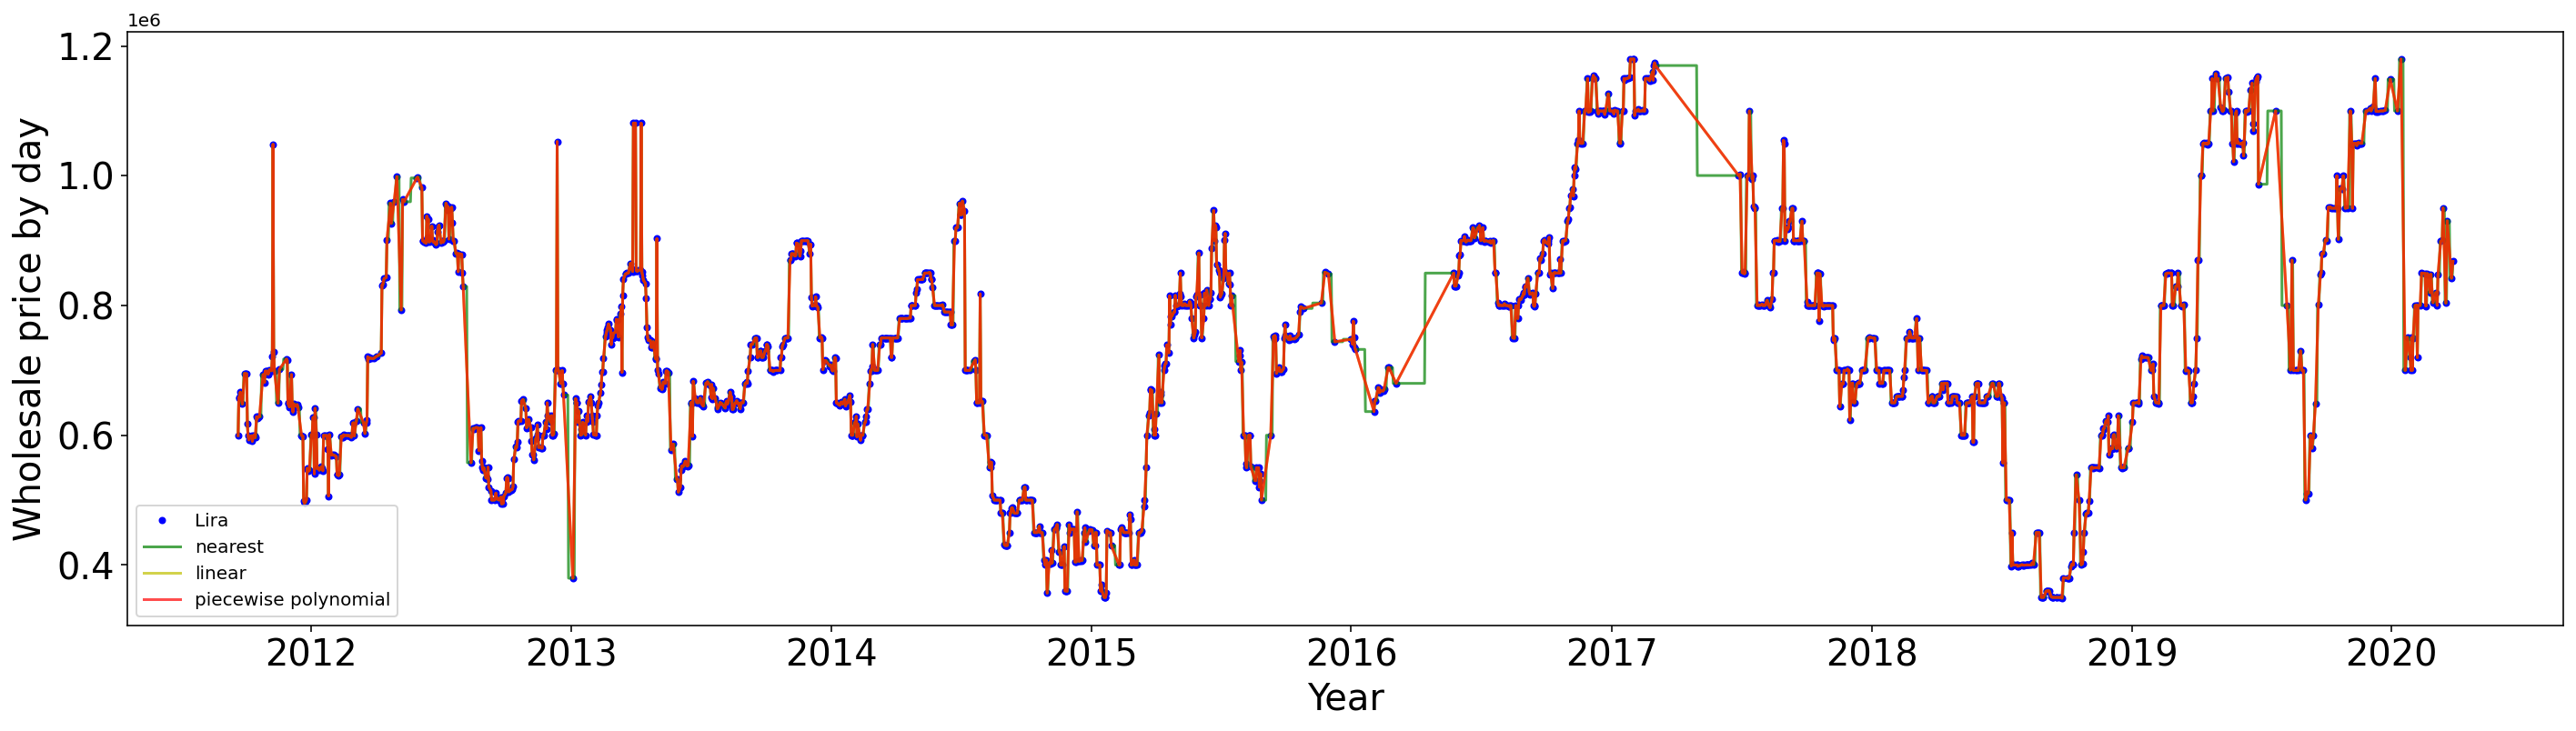

In [18]:
# replace the NaN with interpolated values and visualize for best interpolation method
# since the data is rather ragged, nerest method is picked

yt_n = yt.interpolate(method='nearest')
yt_l = yt.interpolate(method='linear')
yt_pp = yt.interpolate(method='piecewise_polynomial', order=2)

# visualize for best interpolation method
fig = plt.figure()
plot_one_time_series(yt,'b.', label='Lira')
plot_one_time_series(yt_n,'g', label='nearest', alpha=0.7)
plot_one_time_series(yt_l,'y', label='linear', alpha=0.7)
plot_one_time_series(yt_pp,'r', alpha=0.7, label='piecewise polynomial')

plt.show()

y_i = yt_n # y_i: interpolated y

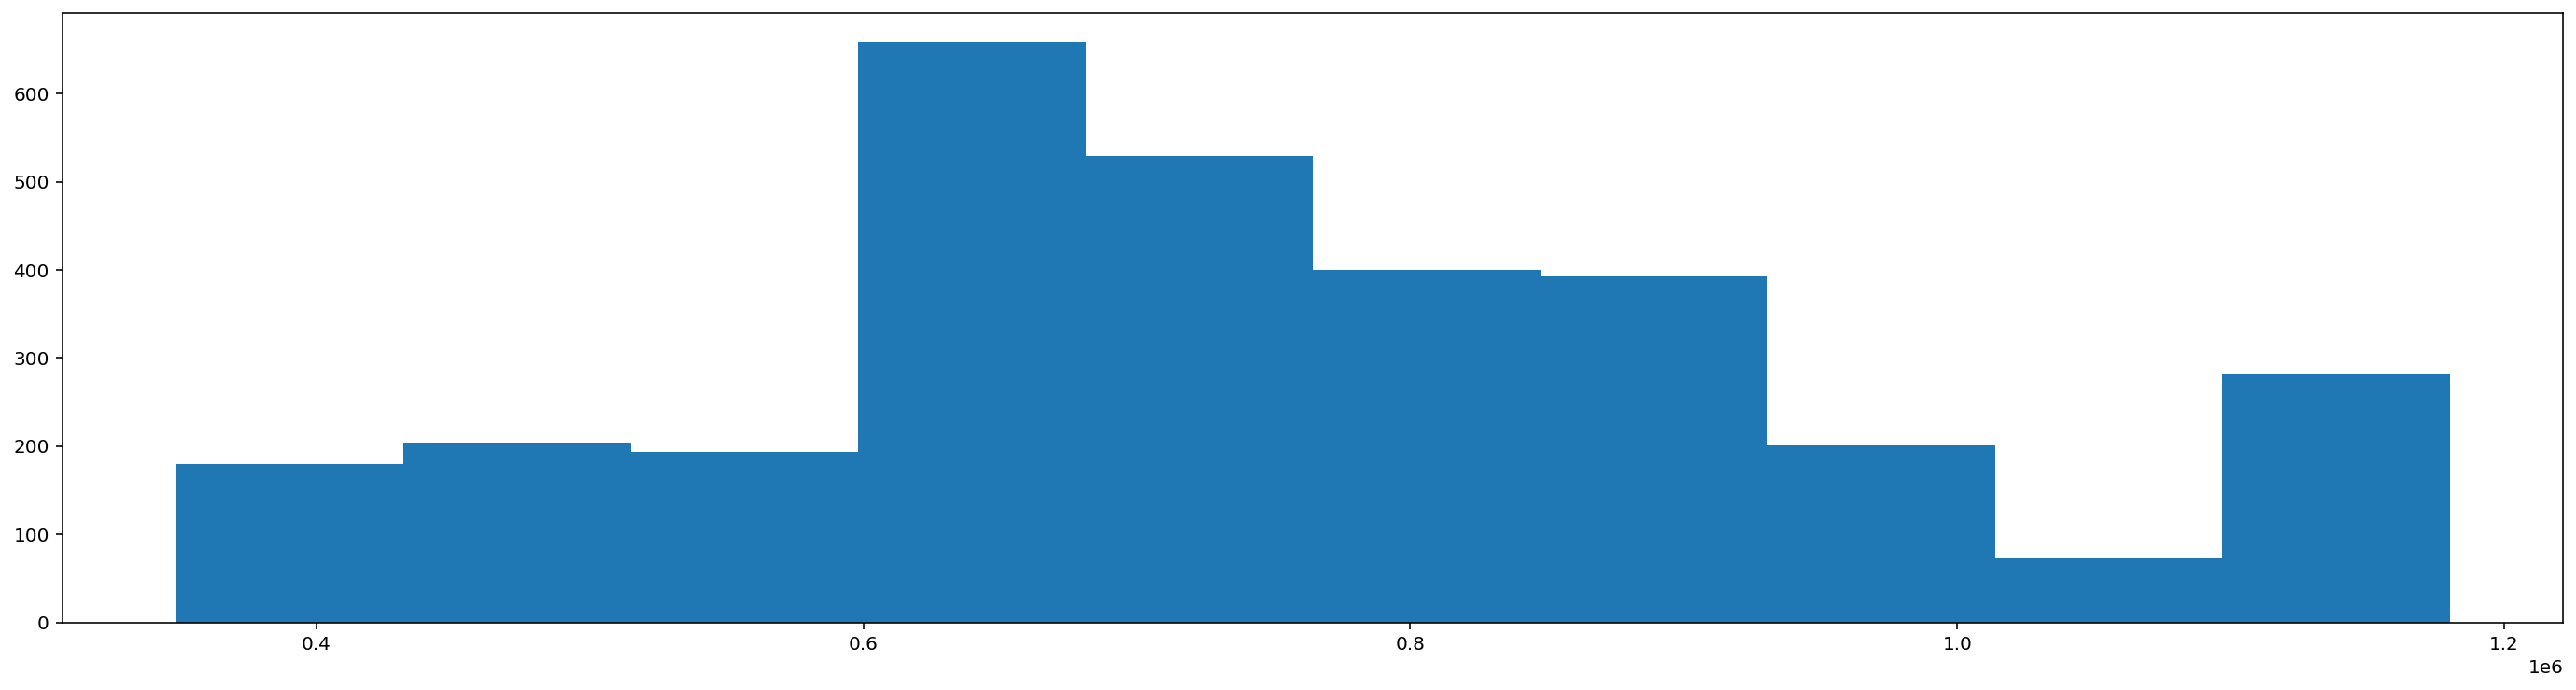

In [19]:
# check the distribution of the data
plt.hist(y_i['wholesale'])
plt.show()

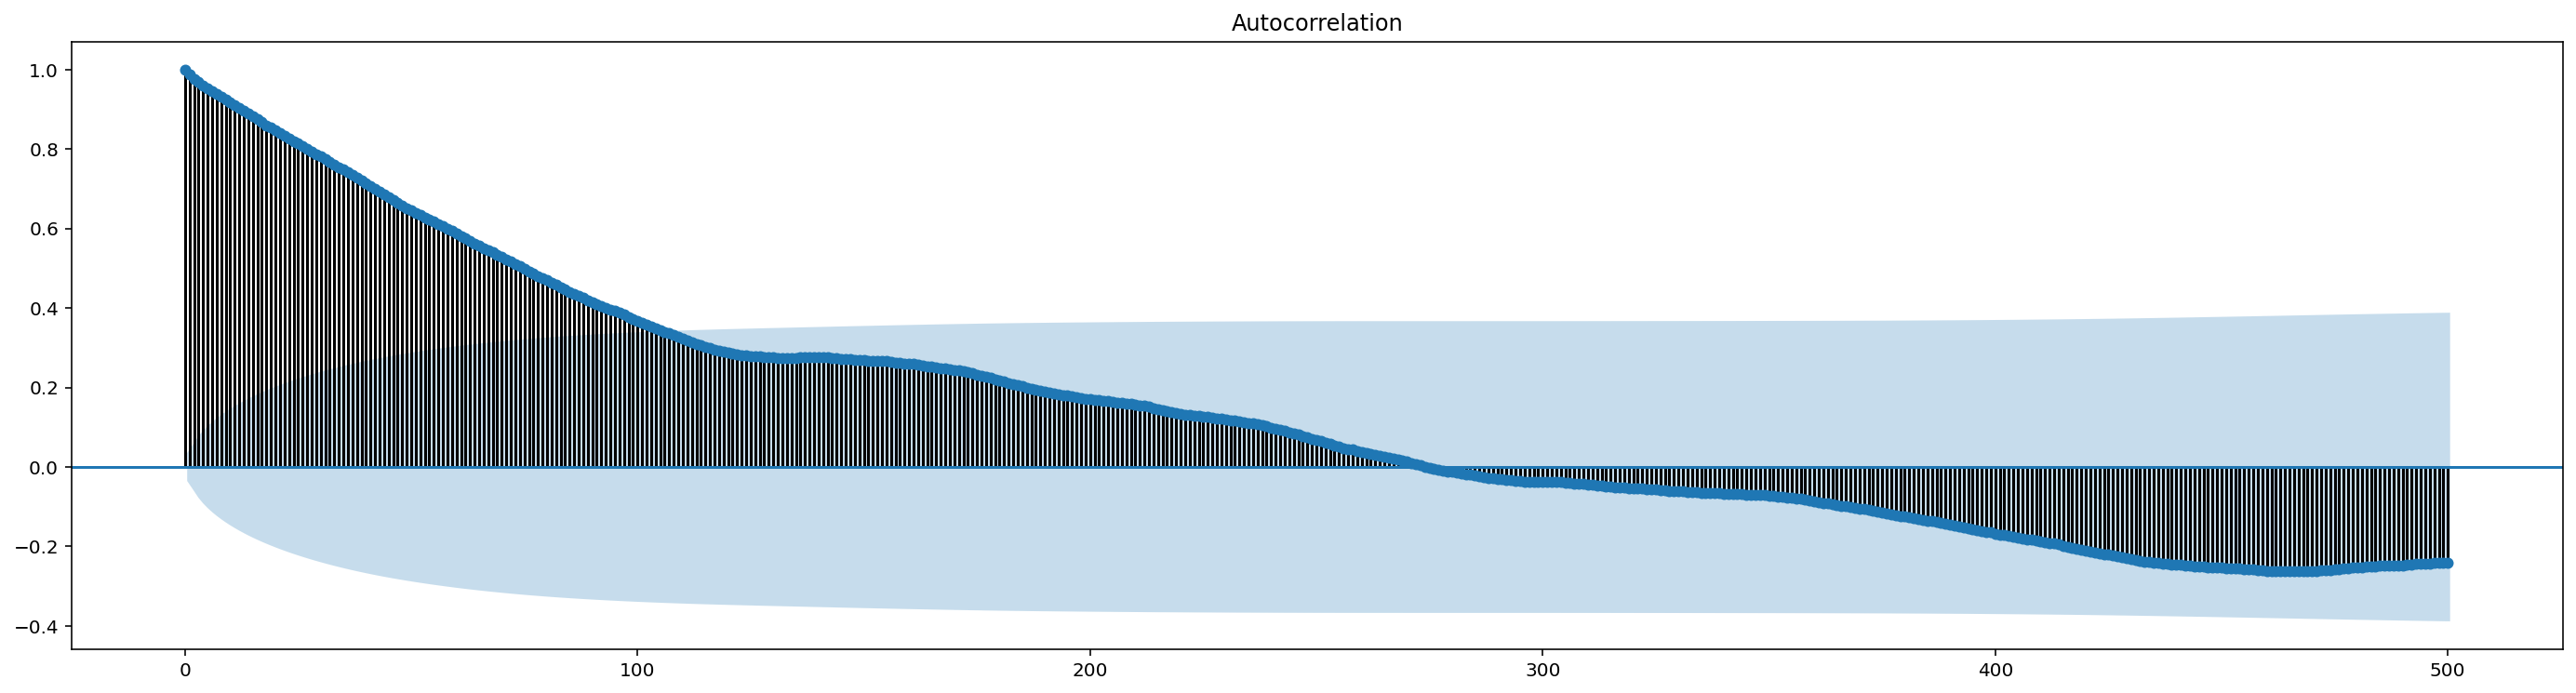

In [20]:
# ACF plot 
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(y_i, lags=500)
plt.show()

In the above correlation plot the cone represents 95% confidence interval.
Notice that we have good positive correlation with the lags upto >700. We cannot use all of those correlations as it will create multi-collinearity problem. Next check on PACF plot to get only the most relevant lags!

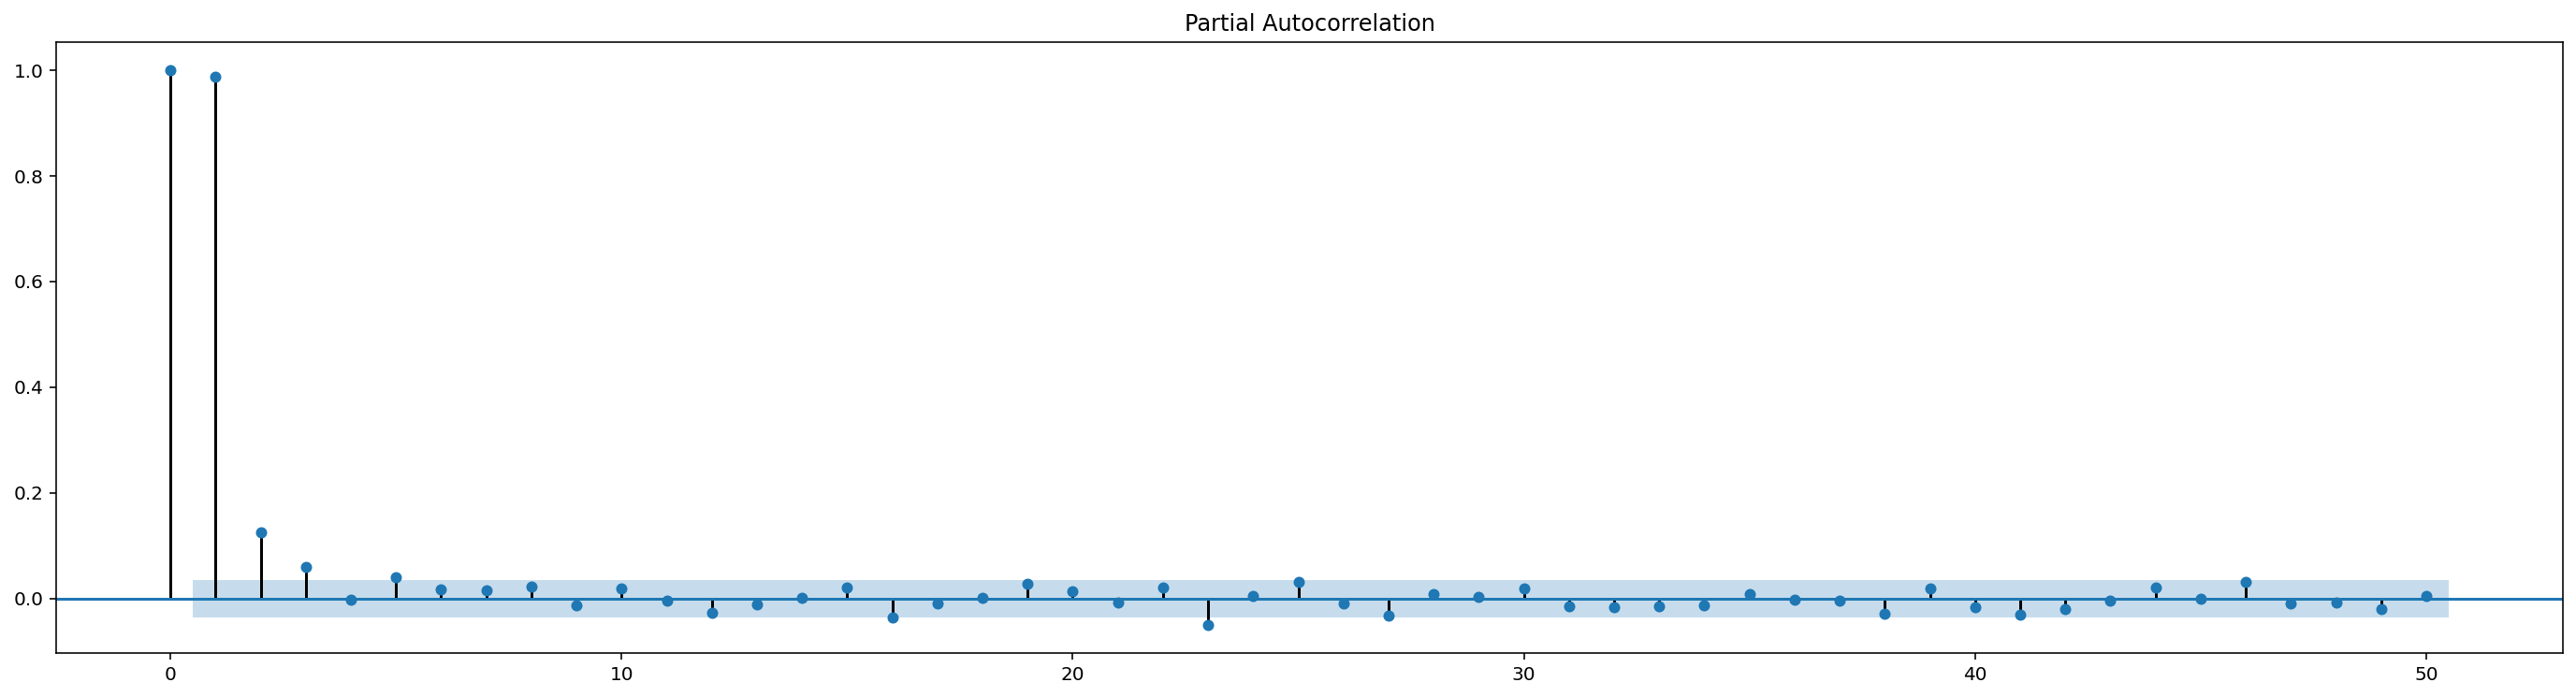

In [21]:
# PACF plot 
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(y_i, lags=50, method='ols')
plt.show()

PACF plots show that lags upto 4 have good correlation before the plot first cuts the upper confidence interval. So for the AR process, use lag 4. 

In [29]:
# first see if we can assume there is no trend and seasonal components:
from statsmodels.tsa.seasonal import seasonal_decompose
# see 6 month seasonal component 
period = 12 
s = seasonal_decompose(y_i,
                       period=period,
                       model='additive')

s.plot()
plt.show()

NameError: name 'y_i' is not defined

<Figure size 1584x1440 with 0 Axes>

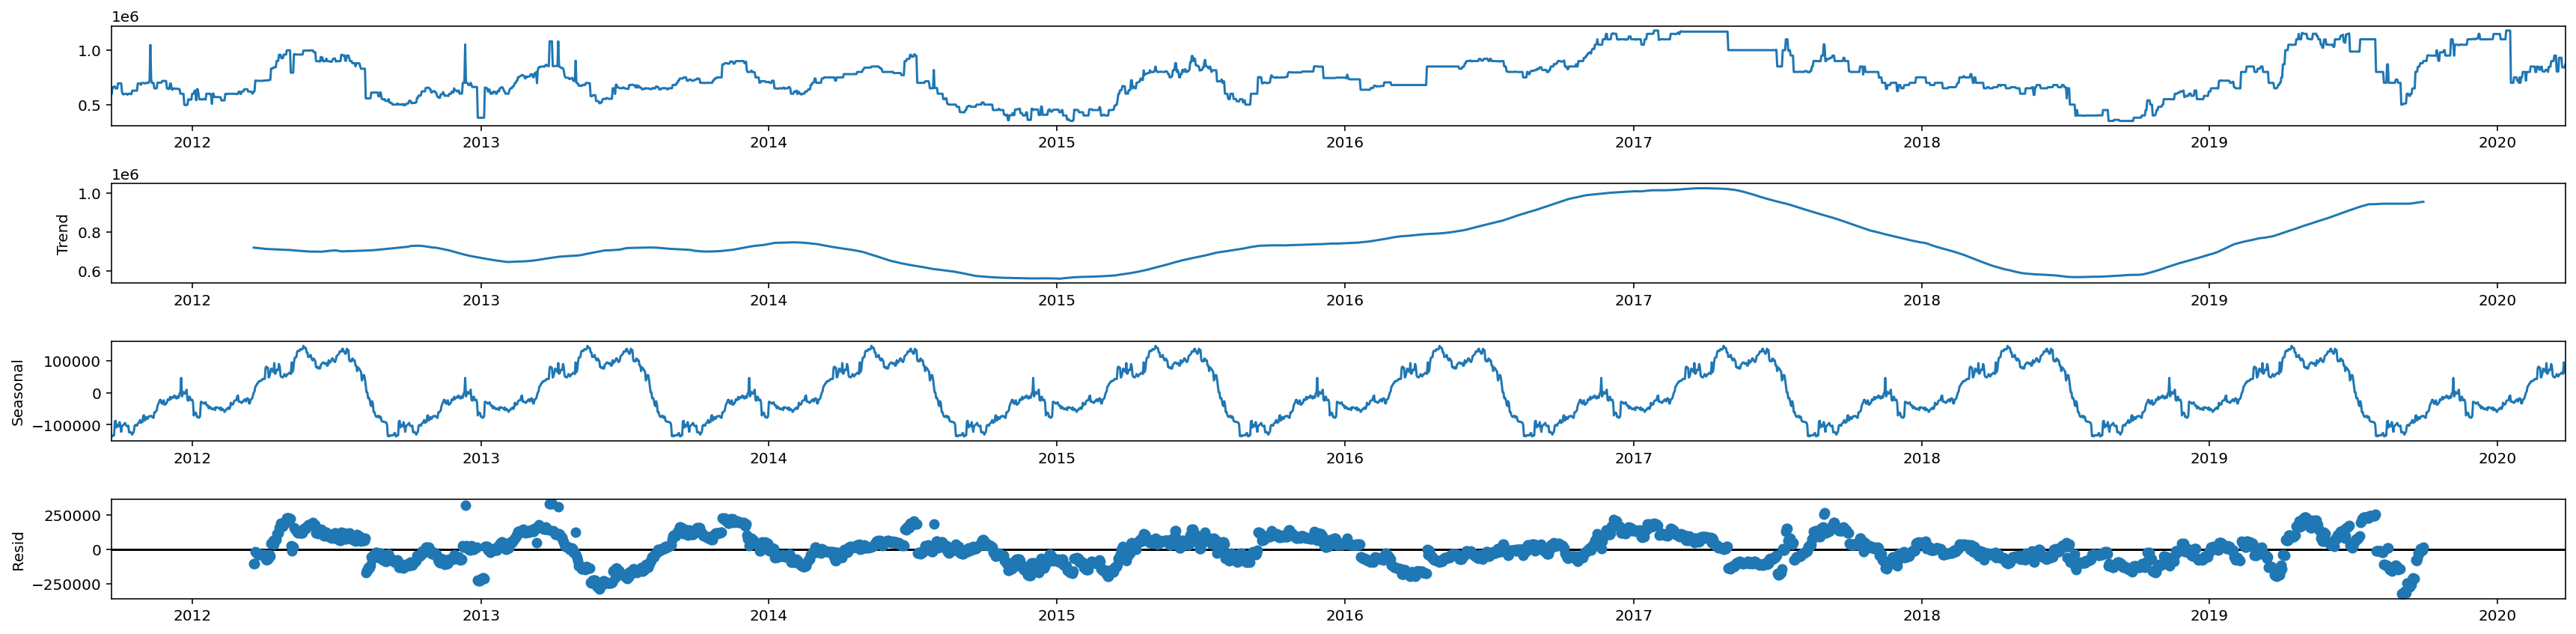

In [54]:
# first see if we can assume there is no trend and seasonal components:
from statsmodels.tsa.seasonal import seasonal_decompose
# see 6 month seasonal component 
period = 30*12 # how many data in 6 mo
s = seasonal_decompose(y_i,
                       period=period,
                       model='additive')

s.plot()
plt.show()

but looking at the residuals we notice that their variance increase from left to right. This is a sign of heteroskedasticity. You can look up the exact definition by yourself, just keep in mind that this is not good and that something is missing in our model.

In [57]:
fig = plt.figure(figsize=(22, 8))

ax1=fig.add_subplot(411)
ax1.plot(yt,'.')
ax1.title.set_text('Interpolated daily price')

ax2=fig.add_subplot(412)
ax2.plot(s.trend)
ax2.title.set_text('trend')

ax1=fig.add_subplot(413)
ax1.plot(s.seasonal)
ax1.title.set_text('Seasonal component')

ax2=fig.add_subplot(414)
ax2.plot(s.resid,'.', markersize=5)
ax2.title.set_text('Residuals')

plt.show()

In [ ]:
# ??? Should the trend have a clear increasing/decreasing pattern? 
# Does the noise have to be pure noise? uncorrelated, gaussian distributed?

Note: my coworker used a Seasonal Autoregressive Integrated Moving-Average (SARIMA) to predict.
So I am trying a different approach.

!!! Thoughts: the trend is not really a trend. Maybe I should discard data before 2012 to get trend, seasonal component, and a NIID noise.

/Users/jing/.pyenv/versions/3.8.1/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/jing/.pyenv/versions/3.8.1/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


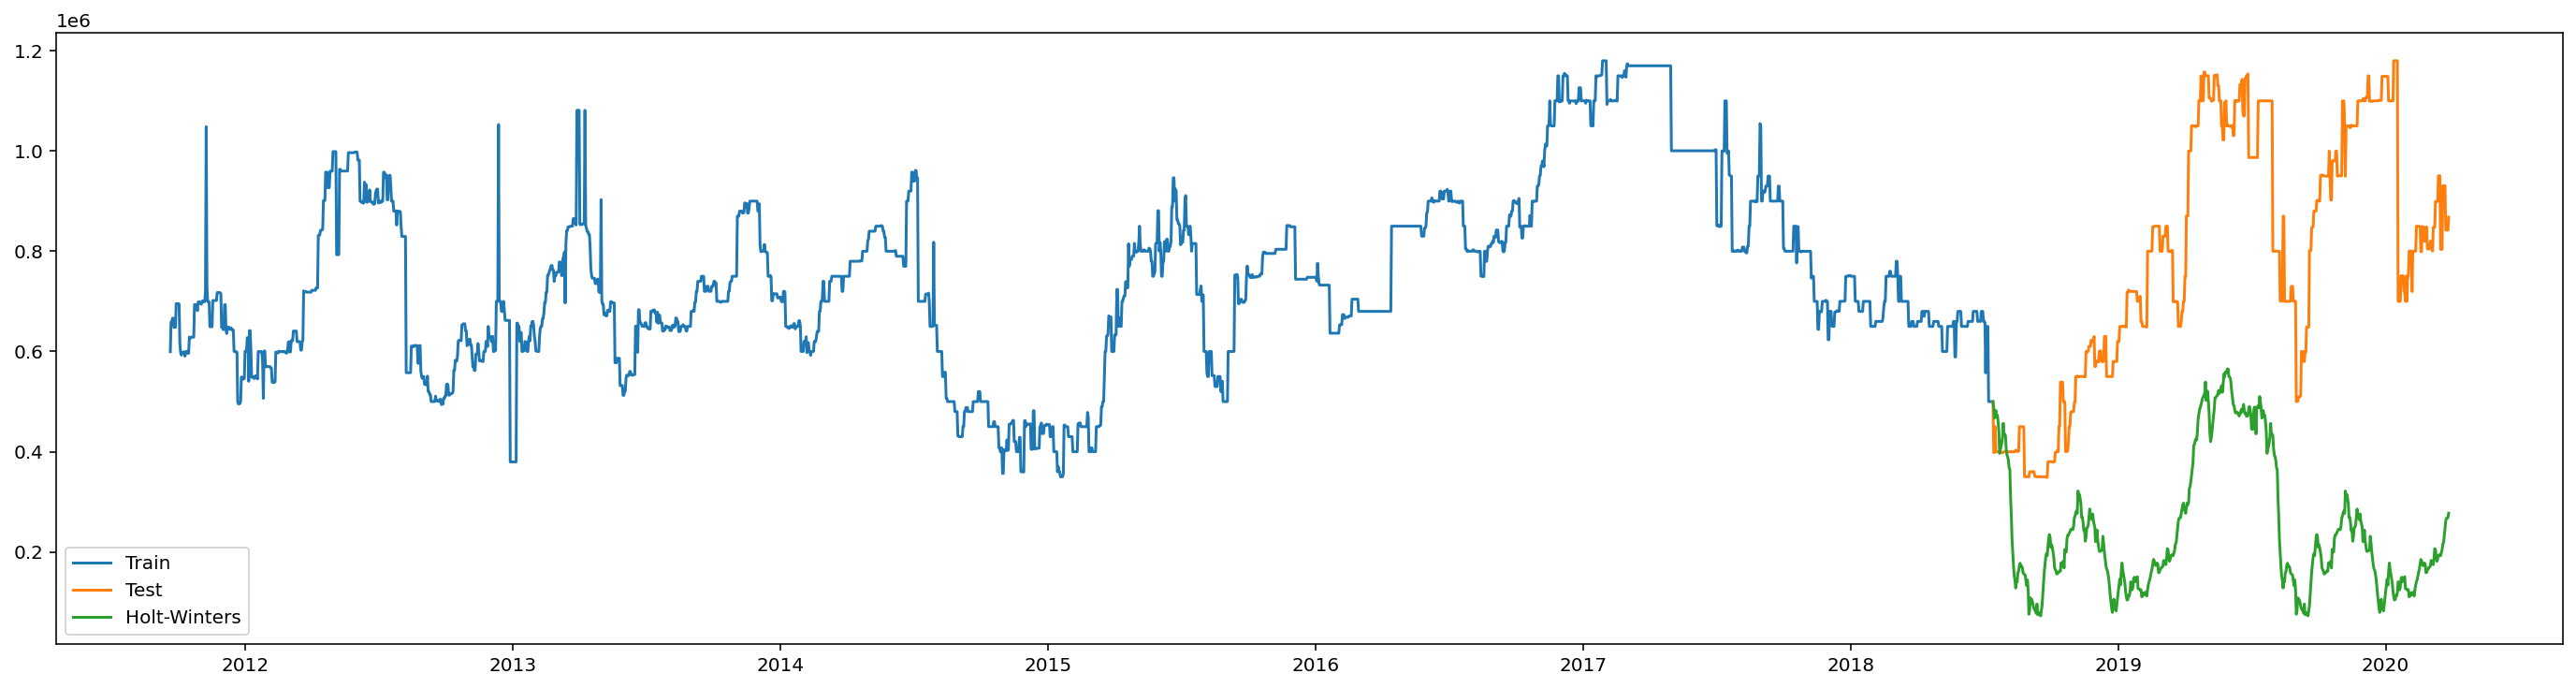

In [67]:
#  Predict using Holt Winter’s Exponential Smoothing (HWES), time series with trend and seasonal component
from statsmodels.tsa.holtwinters import ExponentialSmoothing

T = int(0.8*len(y_i))
train, test=y_i.iloc[:T,0], y_i.iloc[T:,0]

model = ExponentialSmoothing(train, 
                             trend='add', 
                             seasonal='add', 
                             seasonal_periods=365, 
                             damped=True)

hw_model = model.fit(optimized=True, use_boxcox=False, remove_bias=Flase)
# optimize smoothing level, slope, seasonal, and damping slope
# Need to grid search other hyperparameters

pred = hw_model.predict(start=test.index[0], end=test.index[-1])

plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(pred.index, pred, label='Holt-Winters')
plt.legend(loc='best')
## ??? model is sensitive to the start of prediction, will that be solved use cross validation?

In [68]:
# split data for cross validation
from sklearn.model_selection import TimeSeriesSplit
n_splits = 5
tscv = TimeSeriesSplit(n_splits=n_splits, max_train_size=np.round(len(y_i)*0.9))
tscv

TimeSeriesSplit(max_train_size=2800.0, n_splits=5)

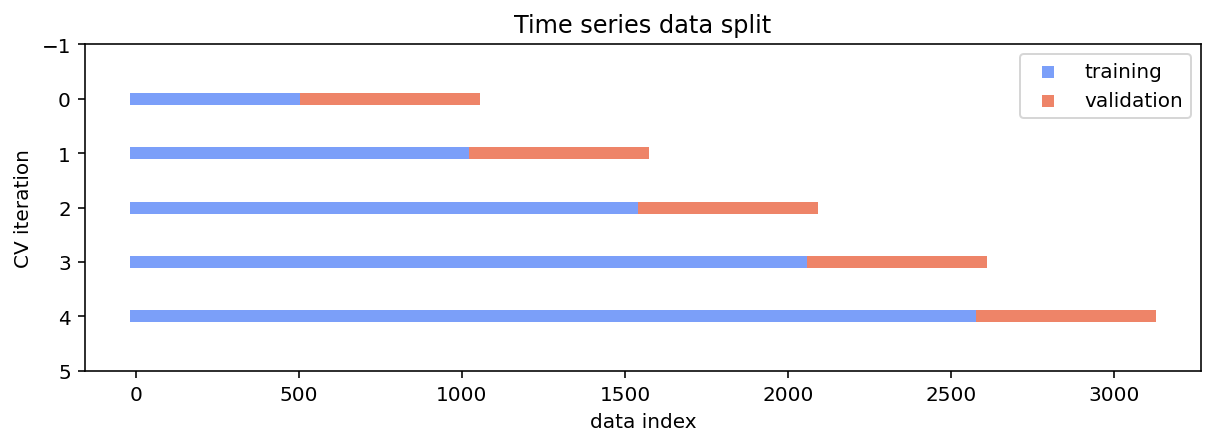

In [69]:
# visualize how the cross validation split is like for this time series
fig, ax = plt.subplots(figsize=(10, 3))
for ii, (train, test) in enumerate(tscv.split(y_i)):
    l1 =ax.scatter(train, [ii]*len(train), c=[plt.cm.coolwarm(.2)], marker='_', lw=6)
    l2 =ax.scatter(test, [ii]*len(test), c=[plt.cm.coolwarm(.8)], marker='_', lw=6)
    ax.set(ylim=[n_splits, -1], title = 'Time series data split',
          xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['training', 'validation'])


In [74]:
# grid search 
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# split into train/test sets
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
    return sqrt(mean_squared_error(actual, predicted))

In [76]:
# one-step Holt Winter’s Exponential Smoothing forecast
def exp_smoothing_forecast(history, config):
    t,d,s,p,b,r = config
    # define model
    history = np.array(history)
    model = ExponentialSmoothing(history, trend=t, damped=d, seasonal=s, seasonal_periods=p)
    # fit model
    model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)
    # make one step forecast
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0]

In [77]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
    predictions = list()
    # split dataset
    train, test = train_test_split(data, n_test)
    # seed history with training dataset
    history = [x for x in train]
    # step over each time-step in the test set
    for i in range(len(test)):
        # fit model and make forecast for history
        yhat = exp_smoothing_forecast(history, cfg)
        # store forecast in list of predictions
        predictions.append(yhat)
        # add actual observation to history for the next loop
        history.append(test[i])
    # estimate prediction error
    error = measure_rmse(test, predictions)
    return error

In [78]:
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
    result = None
    # convert config to a key
    key = str(cfg)
    # show all warnings and fail on exception if debugging
    if debug:
        result = walk_forward_validation(data, n_test, cfg)
    else:
        # one failure during model validation suggests an unstable config
        try:
            # never show warnings when grid searching, too noisy
            with catch_warnings():
                filterwarnings("ignore")
                result = walk_forward_validation(data, n_test, cfg)
        except:
            error = None
    # check for an interesting result
    if result is not None:
        print(' > Model[%s] %.3f' % (key, result))
    return (key, result)

In [79]:
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
    scores = None
    if parallel:
        # execute configs in parallel
        executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
        tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
        scores = executor(tasks)
    else:
        scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
    # remove empty results
    scores = [r for r in scores if r[1] != None]
    # sort configs by error, asc
    scores.sort(key=lambda tup: tup[1])
    return scores
 

In [80]:
# create a set of exponential smoothing configs to try
def exp_smoothing_configs(seasonal=[None]):
    models = list()
    # define config lists
    t_params = ['add', 'mul', None]
    d_params = [True, False]
    s_params = ['add', 'mul', None]
    p_params = seasonal
    b_params = [True, False]
    r_params = [True, False]
    # create config instances
    for t in t_params:
        for d in d_params:
            for s in s_params:
                for p in p_params:
                    for b in b_params:
                        for r in r_params:
                            cfg = [t,d,s,p,b,r]
                            models.append(cfg)
    return models

In [83]:
cfg_list =exp_smoothing_configs(seasonal=[0,6,12,365])

In [85]:
#if __name__ == '__main__':
# load dataset
series = y_i
data = series.values
# data split
n_test = 12
# model configs
cfg_list = exp_smoothing_configs(seasonal=[0,6,12])
# grid search
scores = grid_search(data[:,0], cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)
        

KeyboardInterrupt: 

In [70]:
# cv
i = 1
score=[]
for tr_index, val_index in tscv.split(y_i):
    y_tr, y_val = y_i[tr_index], y_i[val_index]
    rf = RandomForestRegressor(
                        max_features=int(mf),
                        n_estimators=int(ne),
                        max_depth=int(md),
                        min_samples_leaf=int(msl))
    rf.fit(y_tr)
    score.append(rf.score(y_val))

KeyError: "None of [Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,\n            ...\n            511, 512, 513, 514, 515, 516, 517, 518, 519, 520],\n           dtype='int64', length=521)] are in the [columns]"

In [ ]:
# First assume there is no trend nor seasonal components,
# and apply autorgressive integrated moving average (ARIMA) model
from statsmodels.tsa.arima_model import ARIMA
# first trial: lag 1 autogressive term, 1 degree of differencing, first-order ma term, 
model = ARIMA(y_i, order=(4, 1, 1))
model_fit = model.fit()
yt_pred = model_fit.predict(len(y_i), len(y_i))


In [ ]:
np.prod(yt_ma.isnull()) # why the moving avg return all nulls?

In [ ]:
plot_one_time_series(yt_ma)